# Bitcoin Simple Return

## Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

from finta import TA

## Read dataset

In [4]:
df = pd.read_csv('BTC-USD.csv', parse_dates=True, index_col=[0])
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992.0
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000.0
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984.0
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008.0
2017-01-06,1014.239990,1046.810059,883.943970,902.200989,902.200989,351876000.0


In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume'], dtype='object')

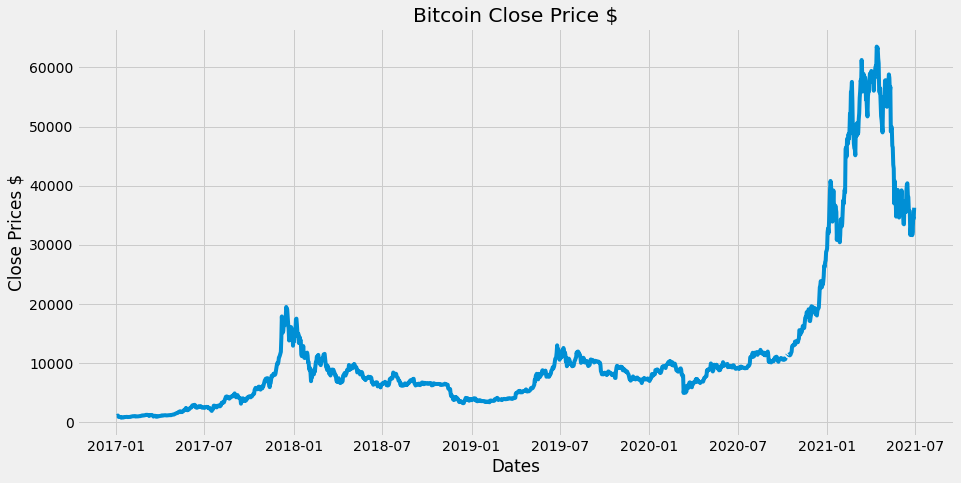

In [8]:
plt.figure(figsize=(14,7))
plt.title('Bitcoin Close Price $')
plt.plot(df['close'])
plt.xlabel('Dates')
plt.ylabel('Close Prices $')
plt.show()

In [11]:
# calcule Daily simple return(DSR)
DSR = df['close'].pct_change()

In [12]:
DSR

Date
2017-01-02         NaN
2017-01-03    0.021620
2017-01-04    0.106233
2017-01-05   -0.122410
2017-01-06   -0.109711
                ...   
2021-06-25   -0.087260
2021-06-26    0.017337
2021-06-27    0.076535
2021-06-28   -0.006214
2021-06-29    0.053457
Name: close, Length: 1640, dtype: float64

In [14]:
DSR.describe()

count    1639.000000
mean        0.003104
std         0.042798
min        -0.371695
25%        -0.015126
50%         0.002338
75%         0.021227
max         0.252472
Name: close, dtype: float64

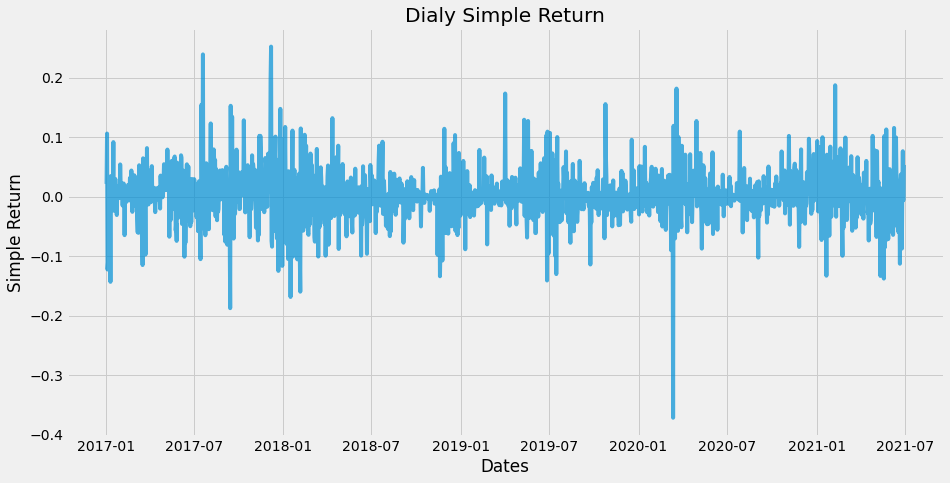

In [15]:
plt.figure(figsize=(14,7))
plt.title('Dialy Simple Return')
plt.plot(DSR.index, DSR, alpha = 0.7)
plt.xlabel('Dates')
plt.ylabel('Simple Return')
plt.show()

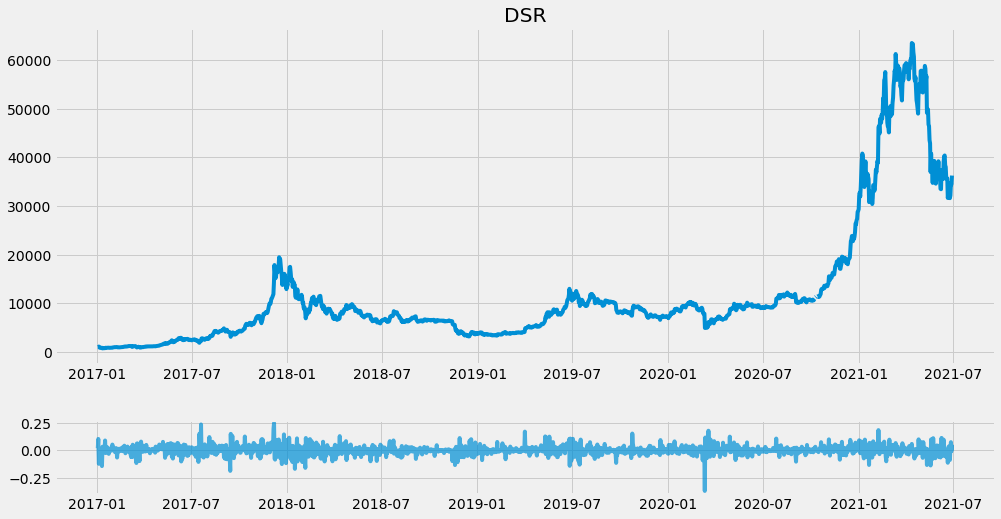

In [16]:
# Viz together
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
top.plot(df.index, df['close'])
plt.title('Bitcoin CLose Price')

#plot 2 DSR
plt.title('DSR')
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.plot(DSR.index, DSR, alpha = 0.7)
plt.subplots_adjust(hspace=0.75)
plt.gcf().set_size_inches(15,8)